# Análisis de Ventas Minoristas y Comportamiento del Cliente

En el dinámico mundo del comercio minorista, comprender el comportamiento de los consumidores es clave para mejorar estrategias de ventas y optimizar la gestión de inventarios. Este proyecto analiza un conjunto de datos recopilado entre 2021 y 2023 en 10 centros comerciales de Estambul, proporcionando información detallada sobre las tendencias de compra en la ciudad.

A través del análisis de datos, exploraremos qué productos son los más vendidos, cómo influyen factores como la edad y el género en las compras, qué métodos de pago son más utilizados y cómo varían las ventas según la ubicación y la temporada.

In [2]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("customer_shopping_data.csv")

In [122]:
df.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


In [124]:
#Imprime la información general/resumida sobre el dataframe
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


La sección de carga de datos utiliza correctamente pandas para leer los archivos CSV y verifica la estructura de los datos con métodos como .info() y .head()

## Procesamiento y Limpieza de datos

In [127]:
#Convertir invoice_date a formato de fecha
df['invoice_date']=df['invoice_date'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [129]:
df.sample(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
25774,I299476,C241953,Female,49,Food & Beverage,1,5.23,Credit Card,2022-11-28,Kanyon
43563,I322177,C313354,Female,25,Toys,1,35.84,Debit Card,2022-05-18,Zorlu Center
37629,I221768,C738085,Male,36,Technology,1,1050.00,Debit Card,2022-11-28,Mall of Istanbul
62587,I788277,C123737,Male,57,Technology,1,1050.00,Credit Card,2021-12-11,Mall of Istanbul
92215,I240986,C274493,Female,33,Shoes,2,1200.34,Cash,2022-12-22,Metropol AVM
44250,I670595,C226922,Male,52,Clothing,1,300.08,Cash,2022-09-27,Cevahir AVM
54880,I332342,C258814,Male,37,Cosmetics,1,40.66,Cash,2023-06-03,Forum Istanbul
42614,I168627,C199252,Female,51,Clothing,1,300.08,Cash,2022-03-27,Metrocity
9570,I225124,C693085,Female,50,Books,2,30.30,Cash,2022-04-24,Viaport Outlet
56528,I840901,C170321,Female,20,Souvenir,1,11.73,Cash,2022-07-15,Kanyon


In [131]:
#Revisar valores unicos
print(df['payment_method'].unique())


['Credit Card' 'Debit Card' 'Cash']


In [133]:
print(df['shopping_mall'].unique())

['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']


In [135]:
#Verificar si hay duplicados
print(df['invoice_no'].duplicated().sum())

0


Para facilitar el análisis se revisó que el conjunto de datos este bien estructurado y sin valores nulos. Así tambien, se transformo la columna invoice_date en formato fecha (datetime) para análisis de tendencias.

## Análisis Exploratorio de Datos (EDA)

### ¿Cuáles son los productos más vendidos?

In [137]:
top_products = df.groupby('category')['quantity'].sum().sort_values(ascending=False)
top_products.head(10)

category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Toys                30321
Shoes               30217
Technology          15021
Books               14982
Souvenir            14871
Name: quantity, dtype: int64

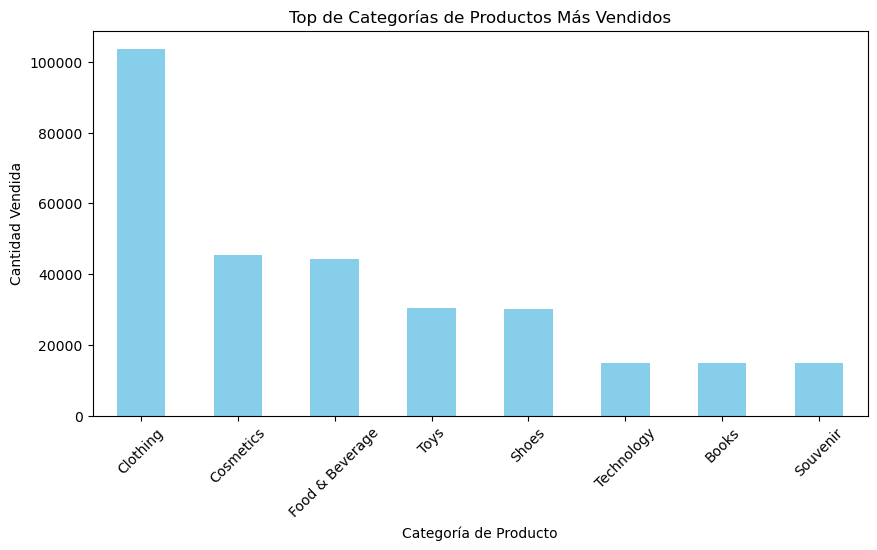

In [100]:
#Representar graficamente

plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top de Categorías de Productos Más Vendidos')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()

El gráfico muestra las categorías de productos con mayor cantidad de unidades vendidas en los centros comerciales de Estambul entre 2021 y 2023.
Se pueden identificar las categorías con mayor demanda, lo que indica qué tipos de artículos son los favoritos de los clientes.

Las razones por las que ciertas categorías de productos tienen mayor demanda pueden estar relacionadas con varios factores clave.

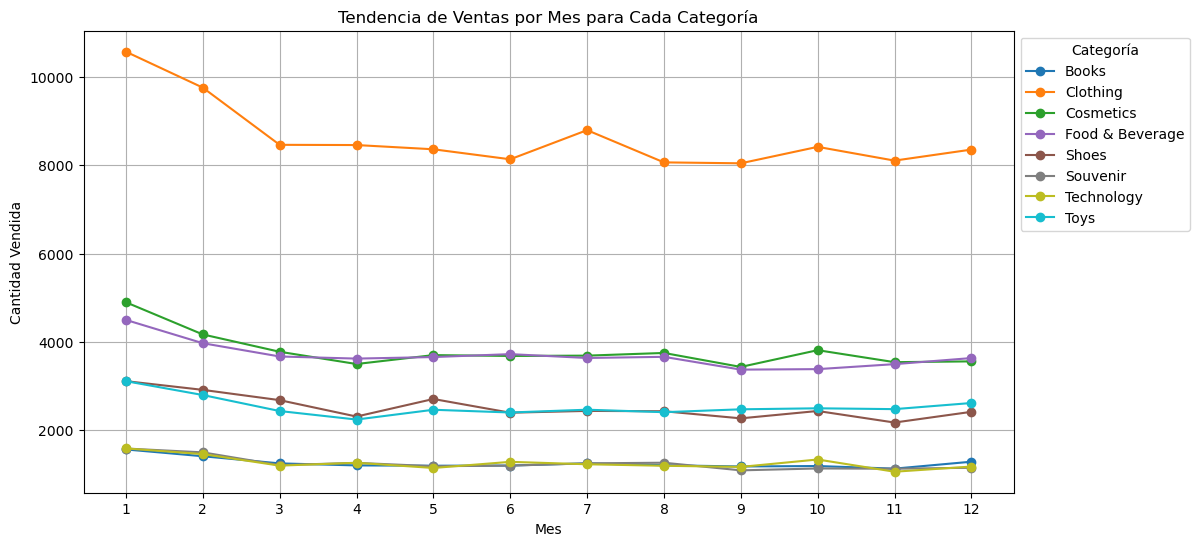

In [139]:
# Extraer el mes de la fecha de compra
df['month'] = df['invoice_date'].dt.month

# Agrupar por categoría y mes, sumando la cantidad de productos vendidos
seasonality = df.groupby(['category', 'month'])['quantity'].sum().unstack()


# Visualizar la tendencia estacional de las categorías principales
seasonality.T.plot(figsize=(12,6), cmap="tab10", marker="o")
plt.title('Tendencia de Ventas por Mes para Cada Categoría')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.xticks(range(1,13))
plt.legend(title="Categoría", bbox_to_anchor=(1,1))
plt.grid()
plt.show()


El gráfico muestra un análisis de la estacionalidad en las ventas. 
Hay categorías que tiene picos de ventas en ciertos meses del año. 
Algunas categorías pueden ser más populares porque satisfacen necesidades básicas o tendencias de moda. Por ejemplo: Clothing y 
Cosmetics.

### ¿Qué métodos de pago son más utilizados?

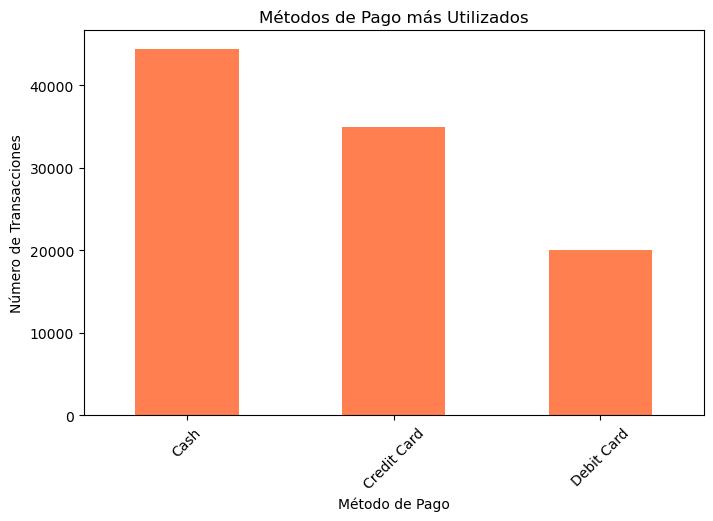

In [144]:
payment_counts = df['payment_method'].value_counts()

plt.figure(figsize=(8,5))
payment_counts.plot(kind='bar', color='coral')
plt.title('Métodos de Pago más Utilizados')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.show()

El uso frecuente de efectivo (cash) como método de pago puede explicarse por varias razones: 
No todos los compradores tienen acceso a tarjetas de crédito o débito, especialmente en ciertas zonas o grupos de edad. O simplemente la preferencia del cliente es pagar en efectivo para evitar deudas en su tarjetas de credito.

### Análisis de Preferencias por Edad y Género

<Figure size 1200x600 with 0 Axes>

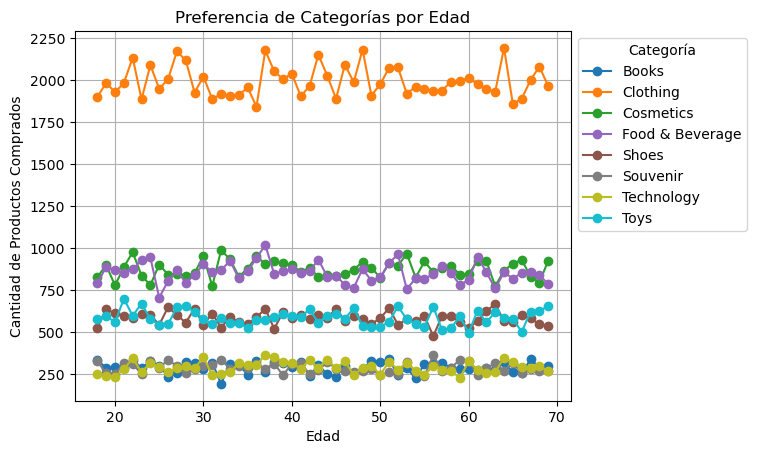

In [149]:
# Agrupar las ventas por edad y categoría
age_category_sales = df.groupby(['age', 'category'])['quantity'].sum().unstack()

# Graficar
plt.figure(figsize=(12,6))
age_category_sales.plot(kind='line', marker='o', colormap="tab10")
plt.title('Preferencia de Categorías por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Productos Comprados')
plt.legend(title="Categoría", bbox_to_anchor=(1,1))
plt.grid()
plt.show()

El gráfico nos muestra que el grupo de edad entre 20 y 35 años tiene una marcada preferencia por la categoría de ropa, siendo esta la más comprada en comparación con otras categorías.
Si se compara con otros grupos de edad entre los 50 y los 60 la preferencia por ropa disminuye significativamente, dando paso a categorías enfocadas a necesidades basicas. 

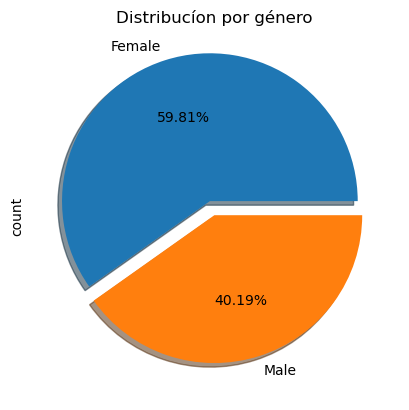

In [179]:
df.gender.value_counts().plot(kind = "pie", autopct = '%0.02f%%', shadow = True, explode = [0.1,0])
plt.title('Distribucíon por género')
plt.show()

<Figure size 1000x500 with 0 Axes>

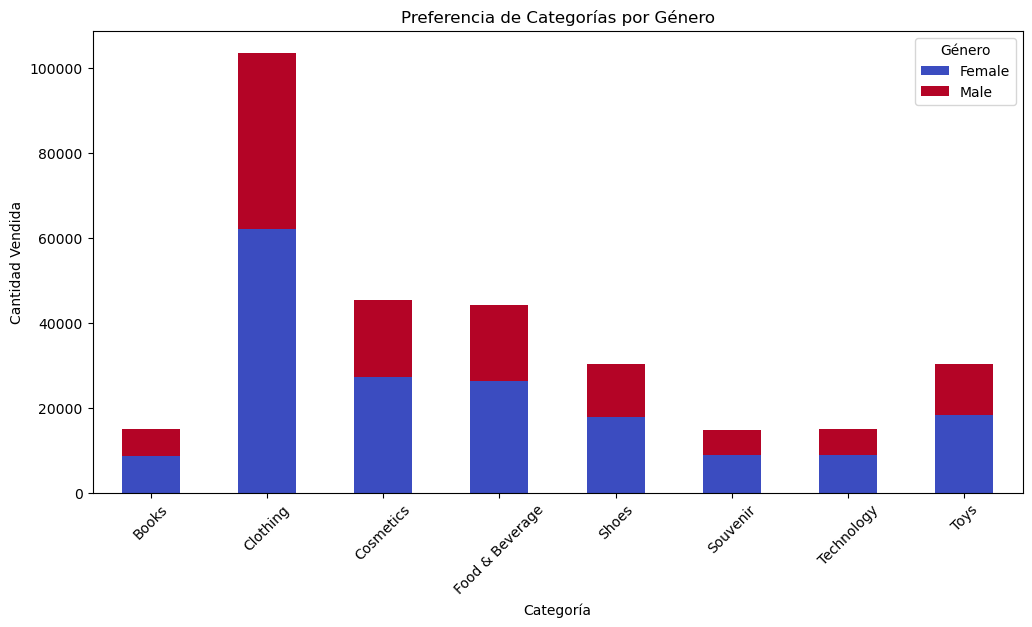

In [162]:
# Agrupar las ventas por género y categoría
gender_category_sales = df.groupby(['gender', 'category'])['quantity'].sum().unstack()

# Graficar
plt.figure(figsize=(10,5))
gender_category_sales.T.plot(kind='bar', figsize=(12,6), colormap="coolwarm", stacked=True)
plt.title('Preferencia de Categorías por Género')
plt.xlabel('Categoría')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.legend(title="Género", bbox_to_anchor=(1,1))
plt.show()

El análisis de la distribución por género en las compras revela que el 59.81% de las transacciones corresponden a clientes del género femenino, mientras que el 40.19% corresponde al género masculino. 
Lo que nos indica que las mujeres suelen estar más involucradas en compras relacionadas con el hogar, moda y bienestar personal, lo que puede explicar su mayor porcentaje en las transacciones.

## Conclusiones

Posterior a un análisis de  las tendencias de compra en los diferentes grupos de edad y género, se pueden extraer las siguientes conclusiones: 

* La categoría de ropa es la más popular entre los consumidores de 20 a 35 años, lo que indica un alto interés en la moda y las tendencias dentro de este segmento.
* Las mujeres representan el 59.81% del total de compras, mientras que los hombres el 40.19%, lo que sugiere que el público femenino tiene una mayor participación en el consumo. Esto podría deberse a que suelen realizar compras más diversificadas y recurrentes, especialmente en categorías como ropa, hogar y belleza.
* Las preferencias de compra varian con la edad: Los consumidores (18-30 años) muestran mayor interés en la ropa.
  Los consumidores mayores de 50 años enfocan sus compras en productos esenciales y comodidad.

De esta manera concluimos como el género y la edad influyen en la selección de productos, lo que puede ayudar a las empresas a personalizar sus estrategias de marketing.